In [1]:
import daft

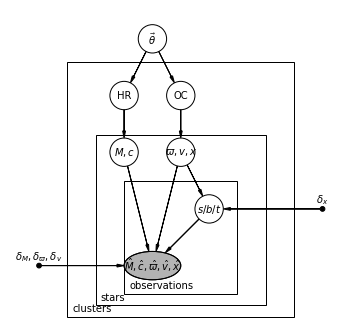

In [39]:
#initialize the PGM
pgm = daft.PGM([6., 5.5], origin=[0, 0])

#undesired hyperparameters
pgm.add_node(daft.Node("physics", r"$\vec{\theta}$", 2.5, 5.))

#desired hyperparameters
pgm.add_node(daft.Node("HR", r"HR", 2., 4.))
pgm.add_node(daft.Node("OC", r"OC", 3., 4.))

#latent variables/parameters
pgm.add_node(daft.Node("photometry", r"$M, c$", 2., 3.))
pgm.add_node(daft.Node("astrometry", r"$\varpi, v, x$", 3., 3.))
pgm.add_node(daft.Node("multiplicity", r"$s/b/t$", 3.5, 2.))

#known constant parameters
pgm.add_node(daft.Node("resolution", r"$\delta_{x}$", 5.5, 2., fixed=True))
pgm.add_node(daft.Node("limits", r"$\delta_{M}, \delta_{\varpi}, \delta_{v}$", 0.5, 1., fixed=True))

#data
pgm.add_node(daft.Node("observations", r"$\hat{M}, \hat{c}, \hat{\varpi}, \hat{v}, \hat{x}$", 2.5, 1., aspect=2., observed=True))

# Add in the edges.
# pgm.add_edge("", "")
pgm.add_edge("physics", "HR")
pgm.add_edge("physics", "OC")

pgm.add_edge("HR", "photometry")
pgm.add_edge("OC", "astrometry")
pgm.add_edge("astrometry", "multiplicity")

pgm.add_edge("resolution", "multiplicity")
pgm.add_edge("limits", "observations")
pgm.add_edge("photometry", "observations")
pgm.add_edge("astrometry", "observations")
pgm.add_edge("multiplicity", "observations")

# pgm.add_edge("dist", "type")
# pgm.add_edge("cosmology", "distance")
# pgm.add_edge("dist", "redshift")
# pgm.add_edge("redshift", "distance")
# #pgm.add_edge("distance", "photometry")
# pgm.add_edge("distance", "lightcurve")
# pgm.add_edge("redshift", "photometry")
# pgm.add_edge("redshift", "lightcurve")
# pgm.add_edge("type", "lightcurve")
# pgm.add_edge("photometry selection", "photometry")
# pgm.add_edge("lightcurve selection", "lightcurve")

# plates
pgm.add_plate(daft.Plate([2., 0.5, 2., 2.], label=r"observations", bbox={"color": "none"}))
pgm.add_plate(daft.Plate([1.5, 0.3, 3., 3.], label=r"stars", bbox={"color": "none"}))
pgm.add_plate(daft.Plate([1., 0.1, 4., 4.5], label=r"clusters", bbox={"color": "none"}))

# Render and save.
pgm.render()
pgm.figure.savefig("OCmodel.png", dpi=250)